# Import Library and Load Dataset

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("👽 Hello.")

👽 Hello.


In [2]:
import os

csv_file_path = '/Users/kenny_jung/aiffel/data_preprocess:/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


# Missing Data

In [3]:
trade['무역수지'].isnull().sum()

4

In [4]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [5]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [6]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [7]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [8]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [9]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [10]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [11]:
trade.isnull().sum()

기간      0
국가명     0
수출건수    0
수출금액    1
수입건수    0
수입금액    0
무역수지    1
dtype: int64

In [12]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


In [13]:
trade[(trade['국가명']=='미국') & ((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [14]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'])/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [15]:
trade.loc[191, '무역수지'] = (trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'])
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


In [16]:
trade.groupby('국가명').mean('수출건수')

,수출건수,수출금액,수입건수,수입금액,무역수지
국가명,,,,,
미국,80319.353846,5.853560e+06,744377.615385,4.376416e+06,1.477144e+06
일본,75868.338462,2.256469e+06,128967.738462,4.139249e+06,-1.882779e+06
중국,197074.439394,1.155607e+07,280528.363636,8.186234e+06,3.369837e+06


# Duplicated Data

In [17]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [18]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [19]:
trade.iloc[186:188,:]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [20]:
trade[(trade['국가명']=='중국') & (trade['기간']=='2020년 03월')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [21]:
trade.drop_duplicates(inplace=True)
print("It's okay, no biggie.")

It's okay, no biggie.


In [22]:
trade[(trade['국가명']=='중국') & (trade['기간']=='2020년 03월')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [23]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [24]:
df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


# 이상치 Outlier

In [25]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index
print("It's okay, nobiggie.")

It's okay, nobiggie.


In [26]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [27]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [28]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [29]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) <= z].index
print("It's okay, nobiggie.")

It's okay, nobiggie.


In [30]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [31]:
np.random.seed(2020)
data = np.random.randn(100) # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5]))) # 이상치 데이터 추가
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

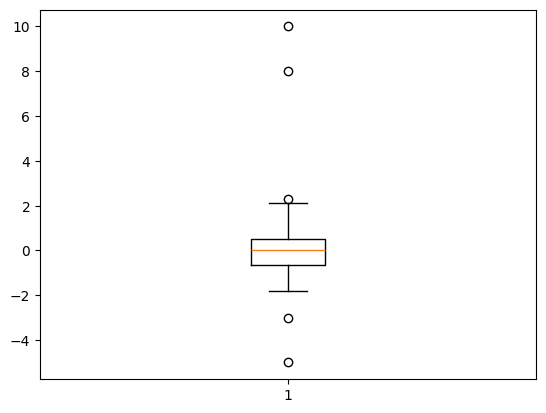

In [32]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

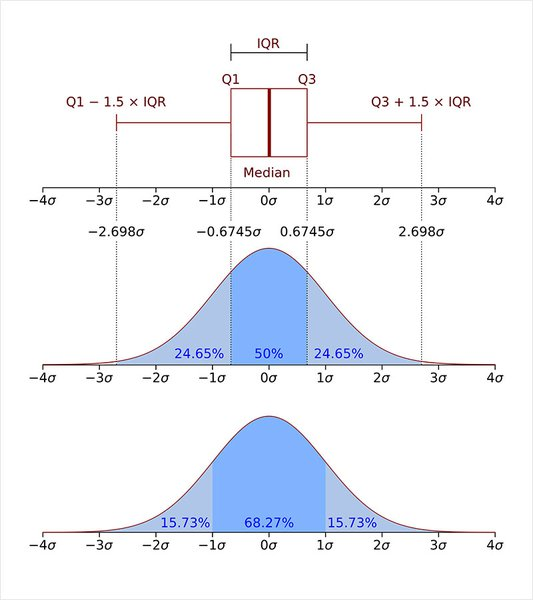

In [33]:
Q3, Q1 = np.percentile(data, [75, 25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [34]:
data[(Q1-1.5*IQR > data) | (Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [35]:
def outlier2(df, col):
    Q3, Q1 = np.percentile(data, [75, 25])
    IQR = Q3 - Q1
    return df[(Q1-1.5*IQR > df[col]) | (Q3+1.5*IQR < df[col])]

outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


# Normalization

In [36]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                  'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [37]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
# 데이터의 평균은 0, 분산은 1로 변환합니다.
# Standardization은 보통 평균이 0이고 표준편차가 1일 때 사용합니다. 그렇기에 데이터가 가우시안 분포를 따를 경우 유용합니다.

x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [38]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
# 데이터의 최솟값은 0, 최댓값은 1로 변환합니다.
# Min-Max Scaling은 피처의 범위가 다를 때 주로 사용하며 확률 분포를 모를 때 유용합니다.


x_min_max = (x - x.min()) / (x.max() - x.min())
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


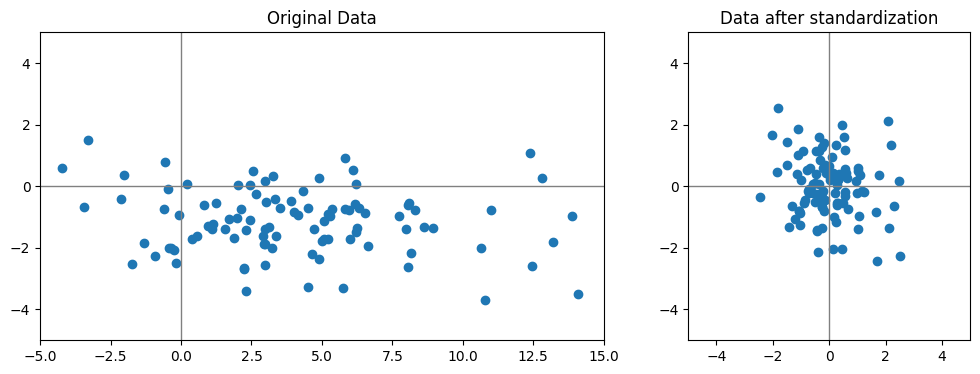

In [39]:
# 데이터를 standardization 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 평균은 0으로, 분산은 1로 데이터를 바꿔줍니다.
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

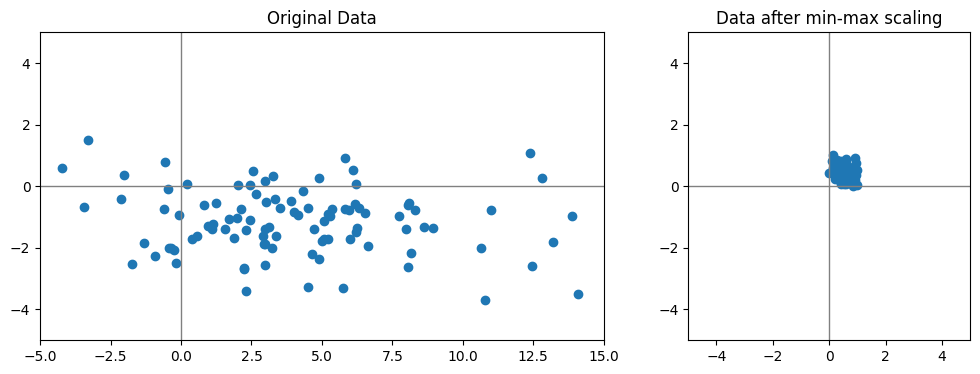

In [40]:
# 동일한 데이터를 min-max scaling 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 최솟값은 0, 최댓값은 1로 바꿔줍니다.
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [41]:
# trade 데이터를 standardization 기법으로 정규화합니다. 
# x_standardization = (x - x.mean())/x.std()

cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [42]:
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,2.277381e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [43]:
# Q. trade 데이터를 min-max scaling 기법으로 정규화합니다.
# x_min_max = (x - x.min()) / (x.max() - x.min())

trade[cols] = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())
trade[cols].head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660


In [44]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("It's okay, no biggie.")

It's okay, no biggie.


In [45]:
# Q. train 데이터와 test 데이터에 정규화를 적용해봅시다.
train_min = train.min()
train_max = train.max()

# 중요한 점은, test 데이터에 min-max scaling을 적용할 때도
# train 데이터 기준으로 수행해야 한다는 것입니다.
train_min_max = train_max - train_min
test_min_max = train_max - train_min

print("💫 It's okay, no biggie...")

💫 It's okay, no biggie...


In [46]:
train_min_max

0    40
1    20
dtype: int64

In [47]:
test_min_max

0    40
1    20
dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("It's okay, no biggie.")

It's okay, no biggie.


In [49]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [50]:
scaler.transform(test)

array([[-0.25,  0.55]])

# One-Hot Encoding

In [51]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


In [52]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,False,False,True
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,True,False,False
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,False,True,False
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,False,False,True
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,True,False,False


In [53]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,False,False,True
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,True,False,False
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,False,True,False
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,False,False,True
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,True,False,False


# Binning (구간화)

In [54]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

👽 Almost there..


<Axes: >

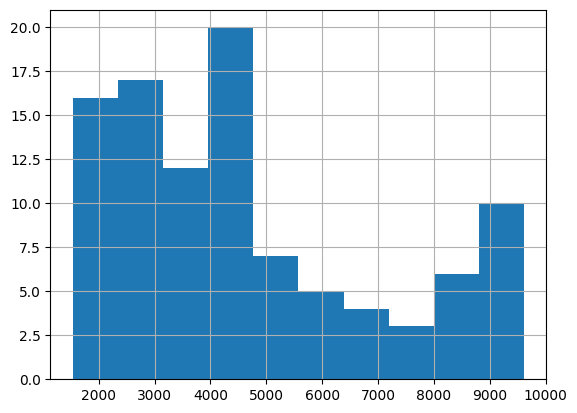

In [55]:
salary.hist()

In [56]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
print("Almost there...")

Almost there...


In [57]:
# cut 함수에 데이터와 구간을 입력하면 데이터를 구간별로 나눠줍니다.
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [58]:
print('Salary[5]:', salary[5])
print('Salary[5]가 속한 카테고리:', ctg[5])

Salary[5]: 4220
Salary[5]가 속한 카테고리: (4000, 6000]


In [59]:
# 구간별로 값이 몇 개가 속해 있는지 value_counts()로 확인
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
Name: count, dtype: int64

In [60]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [61]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
Name: count, dtype: int64

In [62]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [63]:
print(ctg.value_counts().sort_index())
print(".\n.\n Well Done!")

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
Name: count, dtype: int64
.
.
 Well Done!
